In [1]:
import numpy as np
import random

from sklearn.metrics import adjusted_rand_score as ari

from graphs.simulation_graph_sampler import SimulationGraphSampler
from graphs.base_graph import BaseGraph
from visualization.graph_visualization import draw_graph_spring as draw
from simulation.clustering.clustering_strategy import new_correlation_clustering

In [2]:
n = 25
k = 3
log = 0.9
size_communities = ('log_iter', {'std_dev': log, 'threshold': 5})
distribution = ['binomial', 3, 0.99]

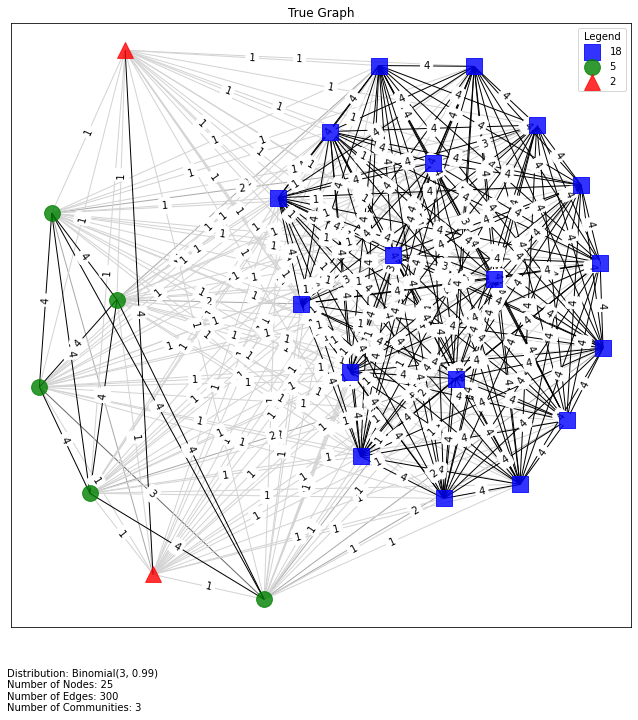

In [3]:
graph = SimulationGraphSampler(n, k, size_communities, distribution).sample_simulation_graph()
draw(graph, 'True Graph', edge_label_flag=True)

In [19]:
def pertubate(graph: BaseGraph, range_judgements: tuple = (1, 4), share: float = 0.1) -> BaseGraph:
    new_graph: BaseGraph = BaseGraph()
    edges = list(graph.G.edges())

    for edge in edges:
        new_graph.add_edge(*edge, graph.get_edge(*edge))
    
    try:
        mod_edge = [edges[i] for i in np.random.choice(len(edges), int(len(edges) * share), replace=False)]
    except ValueError:
        mod_edge = edges
    
    for edge in mod_edge:
        we = new_graph.get_edge_weight_history(*edge)
        we.append(random.randint(range_judgements[0],range_judgements[1]))
        new_graph.add_edge(*edge, np.median(we))
    
    return new_graph


In [20]:
new_graph = pertubate(graph, share=1.1)
cl = new_correlation_clustering(new_graph, {'weights': 'edge_soft_weight', 'max_attempts':10, 'max_iters':np.inf})
new_graph.update_community_nodes_membership(cl)

[4, 4, 4, 4]
4.0
[4, 4, 3, 3]
3.5
[4, 3, 1, 3]
3.0
[4, 2, 4, 1]
3.0
[4, 1, 3, 3]
3.0
[4, 4, 3, 2]
3.5
[4, 1, 1, 1]
1.0
[4, 1, 1, 1]
1.0
[4, 4, 3, 1]
3.5
[4, 3, 3, 4]
3.5
[4, 3, 4, 4]
4.0
[4, 3, 4, 2]
3.5
[4, 3, 4, 1]
3.5
[4, 4, 1, 1]
2.5
[4, 2, 4, 2]
3.0
[4, 3, 1, 4]
3.5
[4, 2, 4, 1]
3.0
[1, 4, 3, 3]
3.0
[1, 4, 1, 2]
1.5
[2, 2, 2, 4]
2.0
[1, 2, 1, 4]
1.5
[1, 3, 4, 3]
3.0
[1, 2, 4, 3]
2.5
[1, 1, 2, 4]
1.5
[4, 3, 4, 3]
3.5
[4, 3, 4, 2]
3.5
[4, 3, 1, 3]
3.0
[4, 4, 2, 4]
4.0
[4, 4, 1, 3]
3.5
[4, 2, 2, 1]
2.0
[4, 2, 2, 3]
2.5
[4, 3, 1, 3]
3.0
[4, 2, 3, 2]
2.5
[4, 1, 1, 3]
2.0
[4, 4, 2, 1]
3.0
[4, 2, 2, 4]
3.0
[4, 4, 2, 2]
3.0
[4, 2, 1, 4]
3.0
[4, 3, 3, 1]
3.0
[4, 2, 3, 1]
2.5
[1, 3, 4, 4]
3.5
[1, 3, 1, 4]
2.0
[1, 3, 2, 1]
1.5
[1, 2, 2, 4]
2.0
[2, 1, 3, 4]
2.5
[1, 4, 2, 2]
2.0
[1, 2, 2, 3]
2.0
[4, 4, 2, 1]
3.0
[4, 1, 3, 3]
3.0
[4, 1, 4, 4]
4.0
[4, 1, 4, 4]
4.0
[4, 1, 4, 4]
4.0
[4, 1, 2, 1]
1.5
[4, 4, 2, 3]
3.5
[4, 2, 3, 4]
3.5
[4, 2, 4, 1]
3.0
[4, 1, 4, 3]
3.5
[3, 1, 2, 2]
2.0
[4, 1, 2, 3]
2

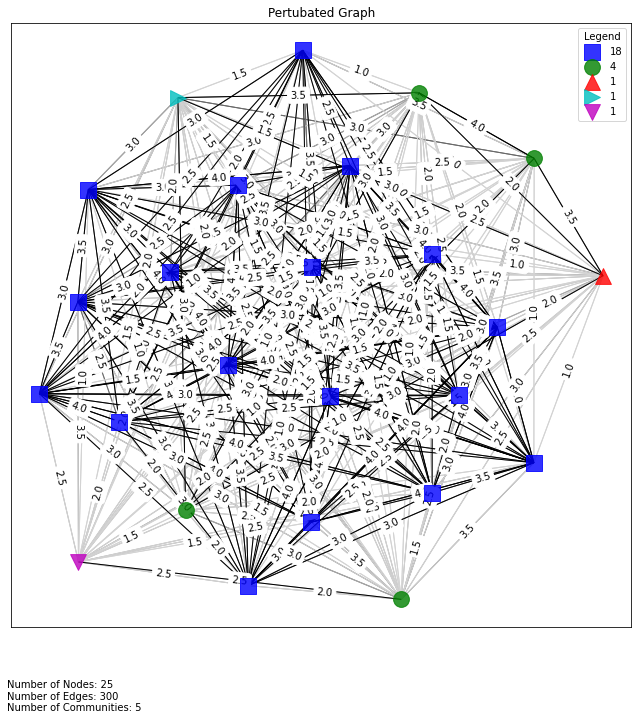

In [18]:
draw(new_graph, 'Pertubated Graph', edge_label_flag=True)

In [14]:
def gen_labels(graph: BaseGraph) -> list:
    labels = [-1] * (max(graph.G.nodes()) + 1)

    for k, v in graph.G.graph['node_community'].items():
        labels[k] = v
    return labels

print(gen_labels(graph)) 
print(gen_labels(new_graph))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 2, 4, 5, 2]


In [15]:
ari(gen_labels(graph), gen_labels(new_graph))

0.9264378065091395